![Quantinuum%20Logos_primary_blue_small.svg](attachment:Quantinuum%20Logos_primary_blue_small.svg)

# Loading QVT data

Each QV data file is saved as a dictionary in a json file with five keys:
- `qv_circs_nomeas`: list of qasm for each qv circuits without optimization and no final measurement
- `qv_circs`: list of qasm for each qv circuit in same order as `qv_circs_nomeas`
- `raw_results`: list of outputs from each shot of each qv circuit in same order as `qv_circs_nomeas`
- `heavy_outputs`: frequency of observed heavy output counts for each circuit in same order as `qv_circs_nomeas` 
- `heavy_ideal`: probability of heavy output without errors in same order as `qv_circs_nomeas`

Available datasets:
- `'n6_H0_raw_results.json'`: QV 64 passed on 06/20/2020
- `'n7_H1-1_raw_results.json'`: QV 128 passed on 09/29/2020
- `'n9_H1-1_raw_results.json'`: QV 512 passed on 03/02/2021
- `'n10_H1-1_raw_results.json'`: QV 1024 passed on 07/12/2021
- `'n11_H1-2_raw_results.json'`: QV 2048 passed on 12/17/2021
- `'n12_H1-2_raw_results.json'`: QV 4096 passed on 04/11/2022


In [1]:
import pathlib
import json

nqubits = 12
machine = 'H1-2'

file_name = f'n{nqubits}_{machine}_raw_results.json'
data_dir = pathlib.Path.cwd().parent.joinpath('data')

with open(data_dir.joinpath(file_name), 'r') as f:
    data = json.load(f)

We can also load each pickle file and directly convert to a qiskit QVFitter object

In [2]:
from qtm_qv.loading_functions import load_fitter

qv_fitter = load_fitter(machine, nqubits)
print(f'Measured HOP = {qv_fitter.ydata[0][0]}')

Measured HOP = 0.69045


## Counting number of gates

In [3]:
from qtm_qv.utils import gate_counts
import numpy as np

counts_nomeas = gate_counts(data['qv_circs_nomeas'])
counts = gate_counts(data['qv_circs'])

print(f'TQ gates (no optimization) = {np.mean(counts_nomeas["cx"])}')
print(f'TQ gates (w/ optimization) = {np.mean(counts["cx"])}')

TQ gates (no optimization) = 216.0
TQ gates (w/ optimization) = 152.97


## Plotting vs circuit index

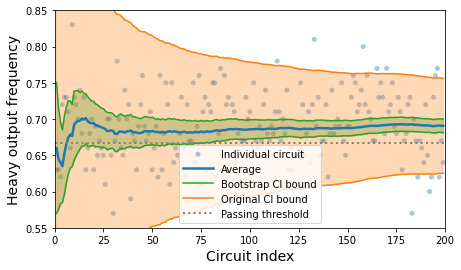

In [4]:
from qtm_qv.plotting_functions import success_v_time

success_v_time(
    qv_fitter, 
    nqubits, 
    original_ci=True,
    bootstrap_ci=True,
    fill_range=True
)

<div align="center"> &copy; 2022 by Quantinuum. All Rights Reserved. </div>